<a href="https://colab.research.google.com/github/helmieresearch/helmieresearch/blob/main/Momentum_Ranking_Model_revised3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Install packages

In [ ]:
!pip install yfinance

In [ ]:
!pip install yahooquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install stockstats

In [ ]:
!pip install mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 6.2 MB/s eta 0:00:00


###Modules and settings

In [83]:
%matplotlib inline
import datetime
from datetime import date
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
import mpld3
mpld3.enable_notebook()
"""
Settings
"""
portfolio_value = 155164.96
perf_last_month = 151728.55
start = "2020-01-01"
end = "2023-09-18"
ranking_day = "2023-09-15"
index_date = 'STXCAP150923.csv'
ranking_table ="ranking_table150923.csv"
portfolio = "portfolio150923.csv"
current_portfolio = "portfolio150923.csv"

# Storing today's date into a variable
today = date.today()
# Storing the specific date
trading_day = today
# Calculate percent difference since last month
perf_pct = (portfolio_value / perf_last_month) - 1
# Print performance, format as percent with two decimals.
print("{} - Last Month Result: {:.2%}".format(trading_day, perf_pct))
# Remember today's portfolio value for next month's calculation
#perf_last_month = portfolio_value

2023-12-07 - Last Month Result: 2.26%


###Import Market Data

In [77]:
#Import required libraries
import pandas as pd
import json
import requests
import glob
import os
from yahooquery import Ticker
from datetime import datetime

now = datetime.now().strftime("%Y-%m-%d")
data = yf.Ticker("STXCAP.JO")
index = data.history(start=start,  end=end)
resetindex = index.reset_index(inplace = True)

index['Date'] = pd.to_datetime(index['Date']).dt.strftime('%Y-%m-%d')

index = index.drop(columns=(['Open', 'High','Low','Volume','Dividends','Stock Splits']))

index.set_index("Date", inplace=True)

index.to_csv(index_date)
STX = pd.read_csv(index_date,index_col='Date', parse_dates=['Date'])
STX['SMA'] = STX['Close'].rolling(200).mean()
STX.plot()
STX['diff'] = STX['Close'] - STX['SMA']
print(STX.tail(1))
"""

params = {'access_key': 'e52cf3b93696352e880916f8c8adbf0c',
          'limit': 350}
api_result = requests.get('http://api.marketstack.com/v1/exchanges/XJSE/tickers', params)
api_response = api_result.json()
print(f"Exchange Name = {api_response['data']['name']}")
for ticker in api_response['data']['tickers']:
  print(f"{ticker['name']}: {ticker['symbol']}")


# Serializing json
json_object = json.dumps(api_response, indent=4)
# Writing to sample.json
with open("jse.json", "w") as outfile:
    outfile.write(json_object)
"""
# Opening JSON file
with open('jse.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)
df1 = pd.json_normalize(json_object["data"]["tickers"])

# dropping null value columns to avoid errors
# new data frame with split value columns
new = df1["symbol"].str.split(".", n = 1, expand = True)
# making separate first name column from new data frame
df1["ticker"]= new[0]
# Dropping old Name columns
df1.drop(columns =["has_intraday","has_eod"], inplace = True)
new.columns = new.columns.astype(str)
new.columns.values[1] = "tickers"
new['0'] + '.' + new['tickers']
new.replace("XJSE", "JO", inplace=True)

result = pd.concat([df1, new], axis=1, join='inner')
df2=result['0'] + '.' + result['tickers']
final = pd.concat([df1, df2], axis=1, join='inner')
final.columns.values[3] = "tickers"
final.columns = final.columns.astype(str)
#Dropping old Name columns
final.drop(columns =["name", "symbol","ticker"], inplace = True)
# Converting a specific Dataframe
# column to list using Series.tolist()
xjse = final["tickers"].tolist()
print("Converting tickers to list...")
print("Output dataframe..." )
print("Writing csv file..." )
print("Saving JSE data to disc...")
print("Saving csv files for each stock to disc...")
symbols = xjse
tickers = Ticker(symbols, asynchronous=True)
data = tickers.history(start= start, end=end, interval='1d')
data= data.drop(['adjclose','dividends','splits'],axis=1)


#Convert dataframe to csv and save to disc
final.to_csv("tickers.csv")
data.to_csv("jse_stocks.csv")

resetindex = data.reset_index(inplace = True)

for i, g in data.groupby('symbol'):
    g.to_csv('/content/Stocks/{}.csv'.format(i), header=True, index_label=False)

# merging the files
joined_files = os.path.join("/content/Stocks/", "*.csv")

# A list of all joined files is returned
joined_list = glob.glob(joined_files)

# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

# new dataframe with different column order
df_new = df.iloc[:, [1, 2, 3, 4, 5, 6, 0]]

Tickers = df_new["symbol"].tolist()
mylist = list(dict.fromkeys(Tickers))
df = pd.DataFrame (mylist, columns = ['tickers'])
df.to_csv("/content/tickers.csv")

#Change date format to Year-Month-Day
df_new['date'] =  pd.to_datetime(df_new['date']).dt.strftime('%Y-%m-%d')

df_new.set_index('date', inplace=True)

for i, g in df_new.groupby('symbol'):
    g.to_csv('/content/Stocks_final3/{}.csv'.format(i), header=True, index_label=False)

symbols = xjse
tickers = Ticker(symbols, asynchronous=True)
data = tickers.history(start=start, end=end, interval='1d')
data= data.drop(['adjclose','dividends','splits'],axis=1)

resetindex = data.reset_index(inplace = True)

# new dataframe with different column order
df_new = data.iloc[:, [1, 2, 3, 4, 5, 6, 0]]

Tickers = df_new["symbol"].tolist()
mylist = list(dict.fromkeys(Tickers))
df = pd.DataFrame (mylist, columns = ['tickers'])
df.columns = df.iloc[1]

df.to_csv("/content/Stocks_final3/tickers.csv")


csv_folder = Path('/content/Stocks_final3')

for file in csv_folder.glob('*.JO.csv'): #create iteratable & iterate on it.
    mydata = pd.read_csv(file)
    mydata.reset_index(inplace = True)
    mydata = mydata.rename(columns={'index': 'date'}, index=None)
    mydata['date'] =  pd.to_datetime(mydata['date']).dt.strftime('%Y-%m-%d')
    mydata.set_index('date', inplace=True)
    df =mydata[["open","high","low","close","volume"]]
    no_outlier_prices = df[(np.abs(stats.zscore(df)) <3).all(axis=1)]
    new_file_name = file.parent.joinpath(f"{file.stem}.csv")
    no_outlier_prices.to_csv(new_file_name) #, index=None, encoding='utf-8-sig', decimal=',')

                  Close          SMA       diff
Date                                           
2023-09-15  3703.835693  3754.351786 -50.516093
Converting tickers to list...
Output dataframe...
Writing csv file...
Saving JSE data to disc...
Saving csv files for each stock to disc...


###Indicators

In [79]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from pathlib import Path
import pandas as pd
import stockstats
from stockstats import StockDataFrame as sdf
import glob

plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
plt.ioff()

tickers = pd.read_csv('/content/Stocks_final3/tickers.csv', header=None)[1].tolist()
stocks = (
    (pd.concat(
        [pd.read_csv(f"/content/Stocks_final3/{ticker}.csv",parse_dates=None, index_col=0)[
        'close'].rename(ticker)
        for ticker in tickers],
        axis=1,
        sort=True)
    )
)
stocks = stocks.loc[:,~stocks.columns.duplicated()]

from scipy.stats import linregress
def momentum(closes):
    returns = np.log(closes)
    x = np.arange(len(returns))
    slope, _, rvalue, _, _ = linregress(x, returns)
    return ((1 + slope) ** 252) * (rvalue ** 2)  # annualize slope and multiply by R^2

momentums = stocks.copy(deep=True)
for ticker in tickers:
    momentums[ticker] = stocks[ticker].rolling(90).apply(momentum, raw=False)

result = momentums.sort_values(by =ranking_day, axis = 1, ascending =False)
result.reset_index(inplace=True)
res=result[~(result['date'] < ranking_day)].dropna(axis=1)

mes = res.reindex(columns = res.columns.tolist()
                                  + ['empty'])

df = mes.set_index(['empty']).stack().reset_index(name='index').rename(columns={'level_2':'date'})

df.columns = df.iloc[0]

df.index = list(df.index)

df.columns.values[0] = "empty"
df.columns.values[1] = "symbol"
df.columns.values[2] = "momentum_score"

df=df.drop(['empty'], axis=1)

finalframe=df.drop(index=0)

finalframe['momentum_score'] =finalframe['momentum_score'].astype(float)

finalframe['rank']=finalframe['momentum_score'].rank(ascending=False)

finalframe['momentum_score'] =finalframe['momentum_score'].astype(float)

#finalframe.style.format({'momentum_score':"{:.2f}"})

Mylist = finalframe["symbol"].tolist()

finalframe.set_index('symbol',inplace=True)

final = pd.concat([df1, df2], axis=1, join='inner')
final.columns.values[3] = "tickers"
final.columns = final.columns.astype(str)

final.set_index('tickers', inplace=True)
Yes = final.reindex(Mylist)

rt = pd.concat([finalframe, Yes], axis=1, join='inner')

rt = rt.iloc[:, [2, 3, 4, 0, 1]]

#rt.style.format({'momentum_score':"{:.2f}"})

# get names of indexes for which column "momentum_score" has value > 40%
index_names = rt[(rt['momentum_score'] < 0.001)].index

# drop these given row indexes from dataFrame
rt.drop(index_names, inplace = True)

rt.reset_index(inplace=True)

lowranked = rt [( rt ['rank'] >= 71)].index

# drop these given row indexes from dataFrame
rt.drop( lowranked, inplace = True)

My_final_list = rt["index"].tolist()

rt.set_index('index',inplace=True)

rt.to_csv(ranking_table)
final_table_columns = My_final_list
final_table =stocks.drop(columns=[col for col in stocks if col not in final_table_columns])

for column in final_table.columns:
    final_table[column].to_csv('/content/momentum_tickers/' + column + '.csv')

vola_table = Path('/content/momentum_tickers')

for file in vola_table.glob('*.JO.csv'): #create iteratable & iterate on it.
    vola_df = pd.read_csv(file)
    vola_df.columns.values[1] = "close"
    vola_df["20d_vol"] = vola_df["close"].pct_change().rolling(20).std()
    #vola_df = sdf.retype(vola_df)['close_90_roc']
    vola_df = pd.DataFrame(vola_df)
    vola_df['date'] =  pd.to_datetime(vola_df['date']).dt.strftime('%Y-%m-%d')
    vola_df['close_90_roc'] = (vola_df['close'] / vola_df['close'].shift(1) - 1).fillna(0)
    vola_df.set_index('date', inplace=True)
    #stockstats_df = sdf.retype(vola_df)['close_90_roc']
    #df = pd.DataFrame(stockstats_df)
    vola_file_name= file.parent.joinpath(f"/content/ranking_table/{file.stem}.csv")
    vola_df.to_csv(vola_file_name) #, index=None, encoding='utf-8-sig', decimal=',')

vola_table1 = Path('/content/ranking_table')

for file in vola_table1.glob('*.JO.csv'): #create iteratable & iterate on it.
    vola_df1 = pd.read_csv(file).tail(1)

    vola_df1['date'] =  pd.to_datetime(vola_df1['date']).dt.strftime('%Y-%m-%d')

    vola_df1.set_index('date', inplace=True)

    vola_file_name1= file.parent.joinpath(f"/content/momentum_stocks/{file.stem}.csv")

    vola_df1.to_csv(vola_file_name1)


# set search path and glob for files
# here we want to look for csv files in the input directory
path = '/content/'
files = glob.glob(path + '/momentum_stocks/*.csv')

# create empty list to store dataframes
li = []

# loop through list of files and read each one into a dataframe and append to list
for f in files:
    # get filename
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_csv(f)
    # create new column with filename
    temp_df['ticker'] = stock
    # data cleaning to remove the .csv
    temp_df['ticker'] = temp_df['ticker'].replace('.csv', '', regex=True)
    # append df to list
    li.append(temp_df)
    #print(f'Successfully created dataframe for {stock} with shape {temp_df.shape}')

# concatenate our list of dataframes into one!
df = pd.concat(li)

ranking_list =df.set_index('ticker').reindex(My_final_list).reset_index()

inv_vol = 1 / ranking_list["20d_vol"]
sum_inv_vol=inv_vol.sum()
vol_targets = inv_vol / sum_inv_vol
ranking_list["weight"] = vol_targets

ranking_list.set_index('ticker', inplace=True)

final_list = pd.concat([rt,ranking_list], axis=1, join='inner')

stockprice = final_list["close"] / 100
pos_weight = portfolio_value * final_list["weight"]
final_list["units"] = pos_weight / stockprice
final_list["ZAR"] = stockprice * final_list["units"]


sma = Path('/content/ranking_table')

for file in sma.glob('*.JO.csv'): #create iteratable & iterate on it.
    sma = pd.read_csv(file)
    sma['date'] =  pd.to_datetime(sma['date']).dt.strftime('%Y-%m-%d')
    sma.set_index('date', inplace=True)

    '''Function'''

    sma['100d_sma'] = sma['close'].rolling(100).mean()

    #sma['index_sma']=index['Close'].rolling(200).mean()

    #sma['trend'] = np.where(sma['close'] > sma['100d_sma'], True, False)

    sma['index'] = index['Close']

    sma['index_sma']=index['Close'].rolling(200).mean()

    sma['trend'] = np.where(sma['close'] > sma['100d_sma'], True, False)

    sma['index_trend']= np.where(sma['index'] > sma['index_sma'], True, False)

    sma_file_name= file.parent.joinpath(f"/content/sma_data/{file.stem}.csv")

    sma.to_csv(sma_file_name)

buy_table = Path('/content/sma_data')

for file in buy_table.glob('*.JO.csv'): #create iteratable & iterate on it.
    buy_list_df = pd.read_csv(file).tail(1)

    buytable = file.parent.joinpath(f"/content/buy_list/{file.stem}.csv")

    buy_list_df.to_csv(buytable)

<ipython-input-79-734c7c1b6842>:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result.reset_index(inplace=True)
<ipython-input-79-734c7c1b6842>:115: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vola_df["20d_vol"] = vola_df["close"].pct_change().rolling(20).std()
<ipython-input-79-734c7c1b6842>:115: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vola_df["20d_vol"] 

In [80]:
vola_df

,close,20d_vol,close_90_roc
date,,,
2020-01-02,1780.0,NaN,0.000000
2020-01-03,1797.0,NaN,0.009551
2020-01-06,1794.0,NaN,-0.001669
2020-01-07,1849.0,NaN,0.030658
2020-01-08,1800.0,NaN,-0.026501
...,...,...,...
2023-09-11,2655.0,0.023502,0.000000
2023-09-12,2526.0,0.025902,-0.048588
2023-09-13,2640.0,0.027743,0.045131


In [70]:

#Also you can use standard operands to achieve what you wanted:
vola_df['close_90_roc'] = (vola_df['close'] / vola_df['close'].shift(1) - 1).fillna(0)

In [71]:
vola_df

,close,20d_vol,close_90_roc
date,,,
2020-01-02,1780.0,NaN,0.000000
2020-01-03,1797.0,NaN,0.009551
2020-01-06,1794.0,NaN,-0.001669
2020-01-07,1849.0,NaN,0.030658
2020-01-08,1800.0,NaN,-0.026501
...,...,...,...
2023-09-11,2655.0,0.023502,0.000000
2023-09-12,2526.0,0.025902,-0.048588
2023-09-13,2640.0,0.027743,0.045131


###Initial Portfolio and Ranking Table

In [81]:
import pandas as pd
import glob

# set search path and glob for files
# here we want to look for csv files in the input directory
path1 = '/content/'
files1 = glob.glob(path1 + '/buy_list/*.csv')

# create empty list to store dataframes
li1 = []

# loop through list of files and read each one into a dataframe and append to list
for f1 in files1:
    # get filename
    stock1 = os.path.basename(f1)
    # read in csv
    temp_df1 = pd.read_csv(f1)
    # create new column with filename
    temp_df1['ticker'] = stock1
    # data cleaning to remove the .csv
    temp_df1['ticker'] = temp_df1['ticker'].replace('.csv', '', regex=True)
    # append df to list
    li1.append(temp_df1)
    #print(f'Successfully created dataframe for {stock1} with shape {temp_df1.shape}')

# concatenate our list of dataframes into one!
Buy = pd.concat(li1)

buying_list = Buy.set_index('ticker').reindex(My_final_list)#.reset_index()

final_buy_list = pd.concat([final_list, buying_list], axis=1, join='inner')

#define list of columns range
cols = [x for x in range(final_buy_list.shape[1])]

#remove second column in DataFrame
cols.remove(12)
cols.remove(13)
cols.remove(14)
cols.remove(15)
cols.remove(16)#view resulting DataFrame
final_buy_list2 =final_buy_list.iloc[:, cols]
final_buy_list2.info()

final_buy_list2 = final_buy_list2.loc[final_buy_list2.trend, :]

index_names1 = final_buy_list2[(final_buy_list2['close_90_roc'] >= 15)].index

# drop these given row indexes from dataFrame
final_buy_list2.drop(index_names1, inplace = True)
final_buy_list2.to_csv(portfolio)
#final_buy_list2
'''
final_buy_list2.ticker = final_buy_list2.ticker+ '.JO'
Tickers = final_buy_list2["ticker"].tolist()
sector_list=[]

for tik in Tickers:
    ticker=yf.Ticker(tik)
    sector=ticker.info['sector']
    sector_list.append(sector)

final_buy_list2['sector'] = sector_list
'''
rp_units= final_buy_list2["units"].sum()
rp_weights = final_buy_list2["weight"].sum()
rp_holdings_value= final_buy_list2["ZAR"].sum()
cash_holdings_rp = portfolio_value - rp_holdings_value

print(f"FRP total units = {rp_units}")
print(f"FRP total units = {rp_weights}")
print(f"FRP holdings value = {rp_holdings_value}")
print(f"RP cash value = {cash_holdings_rp}")
pct_cash_rp = cash_holdings_rp / portfolio_value

final_buy_list2

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, TLM.JO to VUN.JO
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            70 non-null     object 
 1   symbol          70 non-null     object 
 2   ticker          70 non-null     object 
 3   momentum_score  70 non-null     float64
 4   rank            70 non-null     float64
 5   date            70 non-null     object 
 6   close           70 non-null     float64
 7   20d_vol         70 non-null     float64
 8   close_90_roc    70 non-null     float64
 9   weight          70 non-null     float64
 10  units           70 non-null     float64
 11  ZAR             70 non-null     float64
 12  100d_sma        68 non-null     float64
 13  index           70 non-null     float64
 14  index_sma       70 non-null     float64
 15  trend           70 non-null     bool   
 16  index_trend     70 non-null     bool   
dtypes: bool(2), float64(11), object(4

,name,symbol,ticker,momentum_score,rank,date,close,20d_vol,close_90_roc,weight,units,ZAR,100d_sma,index,index_sma,trend,index_trend
TLM.JO,TELEMASTER HOLDINGS LTD,TLM.XJSE,TLM,40178.254450,1.0,2023-09-15,105.0,0.028625,0.000000,0.009571,1414.336628,1485.053459,82.059500,3703.835693,3754.351786,True,False
GLI.JO,GO LIFE INTERNATIONAL LD,GLI.XJSE,GLI,137.268550,2.0,2023-09-15,1.0,22.155931,0.000000,0.000012,191.867536,1.918675,0.813200,3703.835693,3754.351786,True,False
TRU.JO,TRUWORTHS INT LTD,TRU.XJSE,TRU,3.739737,4.0,2023-09-15,7350.0,0.014633,-0.008499,0.018722,39.524179,2905.027172,6009.410000,3703.835693,3754.351786,True,False
ADH.JO,ADVTECH LTD,ADH.XJSE,ADH,1.495643,5.0,2023-09-15,2150.0,0.015216,0.011765,0.018005,129.939029,2793.689115,1874.010000,3703.835693,3754.351786,True,False
SDO.JO,STADIO HOLDINGS LIMITED,SDO.XJSE,SDO,1.465796,6.0,2023-09-15,496.0,0.023295,-0.023622,0.011761,367.921381,1824.890052,470.660000,3703.835693,3754.351786,True,False
FFB.JO,FORTRESS REIT LTD B,FFB.XJSE,FFB,1.353989,7.0,2023-09-15,600.0,0.019485,0.030928,0.014061,363.621608,2181.729645,528.360000,3703.835693,3754.351786,True,False
SUR.JO,SPUR CORPORATION LTD,SUR.XJSE,SUR,1.250428,9.0,2023-09-15,2759.0,0.020696,-0.048293,0.013237,74.446700,2053.984466,2444.840000,3703.835693,3754.351786,True,False
MPT.JO,MPACT LIMITED,MPT.XJSE,MPT,1.207229,10.0,2023-09-15,2986.0,0.017161,0.015992,0.015965,82.960050,2477.187101,2730.400000,3703.835693,3754.351786,True,False
ABG.JO,ABSA GROUP LIMITED,ABG.XJSE,ABG,1.196816,11.0,2023-09-15,17199.0,0.015683,-0.006412,0.017469,15.760370,2710.626000,17182.530000,3703.835693,3754.351786,True,False
RDF.JO,REDEFINE PROPERTIES LTD,RDF.XJSE,RDF,0.949661,12.0,2023-09-15,370.0,0.014497,0.022099,0.018899,792.542042,2932.405557,345.390000,3703.835693,3754.351786,True,False


###List to Liquidate current positions

In [84]:

sell_list = final_buy_list [~final_buy_list
 ["trend"]]
#sell_list.info()
dqs = sell_list ["ticker"].tolist()
cpf=pd.read_csv(current_portfolio)
#sell_list
liquidate = cpf.loc[cpf['ticker'].isin (dqs)].reset_index (drop=True)

newpf = cpf[~cpf['ticker'].isin(liquidate['ticker'])]
dfnew = newpf[~newpf['ticker'].isin(final_buy_list2['ticker'])]

remove = dfnew ["ticker"].tolist()
now = newpf[~newpf['ticker'].isin(dfnew['ticker'])]
now.set_index("ticker", inplace=True)
rebalance = now ["symbol"].tolist()

print(f"Liquidate disqualified stocks = {liquidate['name']}")
print(f"Liquidate stocks not in ranking table= {dfnew['name']}")
print(f"Portfolio after liquidation= {now['name']}")

Liquidate disqualified stocks = Series([], Name: name, dtype: object)
Liquidate stocks not in ranking table= Series([], Name: name, dtype: object)
Portfolio after liquidation= ticker
TLM        TELEMASTER HOLDINGS LTD
GLI       GO LIFE INTERNATIONAL LD
TRU              TRUWORTHS INT LTD
ADH                    ADVTECH LTD
SDO        STADIO HOLDINGS LIMITED
FFB            FORTRESS REIT LTD B
SUR           SPUR CORPORATION LTD
MPT                  MPACT LIMITED
ABG             ABSA GROUP LIMITED
RDF        REDEFINE PROPERTIES LTD
SPG                SUPER GROUP LTD
NWL             NU-WORLD HLDGS LTD
CLI                  CLIENTELE LTD
NPK                     NAMPAK LTD
SYG                 SYGNIA LIMITED
CAT       CAXTON CTP PUBLISH PRINT
VKE       VUKILE PROPERTY FUND LTD
PPC                    PPC LIMITED
INP                   INVESTEC PLC
DNB          DENEB INVESTMENTS LTD
TXT      TEXTAINER GROUP HLDGS LTD
HCI            HOSKEN CONS INV LTD
ART          ARGENT INDUSTRIAL LTD
KAL         

In [85]:
cpf

,Unnamed: 0,name,symbol,ticker,momentum_score,rank,date,close,20d_vol,close_90_roc,weight,units,ZAR,100d_sma,index,index_sma,trend,index_trend
0,TLM.JO,TELEMASTER HOLDINGS LTD,TLM.XJSE,TLM,40178.254450,1.0,2023-09-15,105.0,0.028625,0.000000,0.009571,1414.336628,1485.053459,82.059500,3703.835693,3754.351786,True,False
1,GLI.JO,GO LIFE INTERNATIONAL LD,GLI.XJSE,GLI,137.268550,2.0,2023-09-15,1.0,22.155931,0.000000,0.000012,191.867536,1.918675,0.813200,3703.835693,3754.351786,True,False
2,TRU.JO,TRUWORTHS INT LTD,TRU.XJSE,TRU,3.739737,4.0,2023-09-15,7350.0,0.014633,-0.008499,0.018722,39.524179,2905.027172,6009.410000,3703.835693,3754.351786,True,False
3,ADH.JO,ADVTECH LTD,ADH.XJSE,ADH,1.495643,5.0,2023-09-15,2150.0,0.015216,0.011765,0.018005,129.939029,2793.689115,1874.010000,3703.835693,3754.351786,True,False
4,SDO.JO,STADIO HOLDINGS LIMITED,SDO.XJSE,SDO,1.465796,6.0,2023-09-15,496.0,0.023295,-0.023622,0.011761,367.921381,1824.890052,470.660000,3703.835693,3754.351786,True,False
5,FFB.JO,FORTRESS REIT LTD B,FFB.XJSE,FFB,1.353989,7.0,2023-09-15,600.0,0.019485,0.030928,0.014061,363.621608,2181.729645,528.360000,3703.835693,3754.351786,True,False
6,SUR.JO,SPUR CORPORATION LTD,SUR.XJSE,SUR,1.250428,9.0,2023-09-15,2759.0,0.020696,-0.048293,0.013237,74.446700,2053.984466,2444.840000,3703.835693,3754.351786,True,False
7,MPT.JO,MPACT LIMITED,MPT.XJSE,MPT,1.207229,10.0,2023-09-15,2986.0,0.017161,0.015992,0.015965,82.960050,2477.187101,2730.400000,3703.835693,3754.351786,True,False
8,ABG.JO,ABSA GROUP LIMITED,ABG.XJSE,ABG,1.196816,11.0,2023-09-15,17199.0,0.015683,-0.006412,0.017469,15.760370,2710.626000,17182.530000,3703.835693,3754.351786,True,False
9,RDF.JO,REDEFINE PROPERTIES LTD,RDF.XJSE,RDF,0.949661,12.0,2023-09-15,370.0,0.014497,0.022099,0.018899,792.542042,2932.405557,345.390000,3703.835693,3754.351786,True,False


###Update Ranking Table

In [86]:
portfolio_value2 = 156560.00

final_weights = final_buy_list
final_weights.set_index('rank').reset_index()
final_w = [x for x in range(final_weights.shape[1])]

final_w.remove(12)
final_w.remove(13)
final_w.remove(14)
final_w.remove(15)
final_w.remove(16)
final_weights2=final_weights.iloc[:, cols]
inv_vol2 = 1 / final_weights2["20d_vol"]
sum_inv_vol2 =inv_vol2.sum()
vol_targets2 = inv_vol2 / sum_inv_vol2
final_weights2["weight"] = vol_targets2

final_weights2.set_index('symbol', inplace=True)

stockprice2 = final_weights2["close"] / 100
pos_weight2 = portfolio_value2 * final_weights2["weight"]
final_weights2["units"] = pos_weight2 / stockprice2
final_weights2["ZAR"] = stockprice2 * final_weights2["units"]
final_weights2.to_csv(ranking_table)
final_weights2

<ipython-input-86-dcf7c52c0883>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_weights2["weight"] = vol_targets2
<ipython-input-86-dcf7c52c0883>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_weights2["units"] = pos_weight2 / stockprice2
<ipython-input-86-dcf7c52c0883>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,name,ticker,momentum_score,rank,date,close,20d_vol,close_90_roc,weight,units,ZAR,100d_sma,index,index_sma,trend,index_trend
symbol,,,,,,,,,,,,,,,,
TLM.XJSE,TELEMASTER HOLDINGS LTD,TLM,40178.254450,1.0,2023-09-15,105.0,0.028625,0.000000,0.009571,1427.052489,1498.405114,82.0595,3703.835693,3754.351786,True,False
GLI.XJSE,GO LIFE INTERNATIONAL LD,GLI,137.268550,2.0,2023-09-15,1.0,22.155931,0.000000,0.000012,193.592557,1.935926,0.8132,3703.835693,3754.351786,True,False
OAO.XJSE,OANDO PLC,OAO,123.296417,3.0,2023-09-15,14.0,0.128296,0.000000,0.002135,2388.021151,334.322961,15.7782,3703.835693,3754.351786,False,False
TRU.XJSE,TRUWORTHS INT LTD,TRU,3.739737,4.0,2023-09-15,7350.0,0.014633,-0.008499,0.018722,39.879529,2931.145370,6009.4100,3703.835693,3754.351786,True,False
ADH.XJSE,ADVTECH LTD,ADH,1.495643,5.0,2023-09-15,2150.0,0.015216,0.011765,0.018005,131.107270,2818.806306,1874.0100,3703.835693,3754.351786,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HLM.XJSE,HULAMIN LTD,HLM,0.189898,66.0,2023-09-15,304.0,0.025500,-0.003279,0.010744,553.304165,1682.044662,291.3100,3703.835693,3754.351786,True,False
GPL.XJSE,GRAND PARADE INV LTD,GPL,0.189666,67.0,2023-09-15,300.0,0.018670,-0.035370,0.014674,765.797360,2297.392080,310.1800,3703.835693,3754.351786,False,False
PPH.XJSE,PEPKOR HOLDINGS LTD,PPH,0.185576,68.0,2023-09-15,1539.0,0.017173,0.008519,0.015953,162.289259,2497.631689,1619.2400,3703.835693,3754.351786,False,False


###Rebalance Positions

In [87]:
rebalance1 =final_weights2[final_weights2['name'].isin(now['name'])]

index_names4 = rebalance1 [( rebalance1 ['rank'] >= 71)].index

# drop these given row indexes from dataFrame
Allsale =rebalance1.drop(index_names4)

rebalance3 = rebalance1.reindex(rebalance).set_index('ticker')


now.reset_index(inplace=True)
rebalance3.reset_index(inplace=True)

rebalance3 ["bs"] = rebalance3["units"]-now["units"]
index_names5 = rebalance3 [( rebalance3 ['rank'] >= 71)].index

# drop these given row indexes from dataFrame
rebalance3.drop(index_names5, inplace = True)
rebalance3

,ticker,name,momentum_score,rank,date,close,20d_vol,close_90_roc,weight,units,ZAR,100d_sma,index,index_sma,trend,index_trend,bs
0,TLM,TELEMASTER HOLDINGS LTD,40178.254450,1.0,2023-09-15,105.0,0.028625,0.000000,0.009571,1427.052489,1498.405114,82.059500,3703.835693,3754.351786,True,False,12.715862
1,GLI,GO LIFE INTERNATIONAL LD,137.268550,2.0,2023-09-15,1.0,22.155931,0.000000,0.000012,193.592557,1.935926,0.813200,3703.835693,3754.351786,True,False,1.725021
2,TRU,TRUWORTHS INT LTD,3.739737,4.0,2023-09-15,7350.0,0.014633,-0.008499,0.018722,39.879529,2931.145370,6009.410000,3703.835693,3754.351786,True,False,0.355350
3,ADH,ADVTECH LTD,1.495643,5.0,2023-09-15,2150.0,0.015216,0.011765,0.018005,131.107270,2818.806306,1874.010000,3703.835693,3754.351786,True,False,1.168241
4,SDO,STADIO HOLDINGS LIMITED,1.465796,6.0,2023-09-15,496.0,0.023295,-0.023622,0.011761,371.229248,1841.297072,470.660000,3703.835693,3754.351786,True,False,3.307867
5,FFB,FORTRESS REIT LTD B,1.353989,7.0,2023-09-15,600.0,0.019485,0.030928,0.014061,366.890817,2201.344899,528.360000,3703.835693,3754.351786,True,False,3.269209
6,SUR,SPUR CORPORATION LTD,1.250428,9.0,2023-09-15,2759.0,0.020696,-0.048293,0.013237,75.116028,2072.451202,2444.840000,3703.835693,3754.351786,True,False,0.669327
7,MPT,MPACT LIMITED,1.207229,10.0,2023-09-15,2986.0,0.017161,0.015992,0.015965,83.705918,2499.458721,2730.400000,3703.835693,3754.351786,True,False,0.745868
8,ABG,ABSA GROUP LIMITED,1.196816,11.0,2023-09-15,17199.0,0.015683,-0.006412,0.017469,15.902066,2734.996397,17182.530000,3703.835693,3754.351786,True,False,0.141697
9,RDF,REDEFINE PROPERTIES LTD,0.949661,12.0,2023-09-15,370.0,0.014497,0.022099,0.018899,799.667542,2958.769905,345.390000,3703.835693,3754.351786,True,False,7.125500


###Enter New Positions

In [88]:
ranking_table1 = final_weights2.reindex().set_index('ticker')
#ranking_table1["bs"] = ranking_table1["units"] * 1
ranking_table1.reset_index(inplace=True)

ranking_table1 = ranking_table1.loc[ranking_table1.trend, :]
index_names2 = ranking_table1 [( ranking_table1 ['close_90_roc'] >= 15)].index

# drop these given row indexes from dataFrame
ranking_table1.drop(index_names2, inplace = True)

buynew = ranking_table1 [~ ranking_table1 ['ticker'].isin( rebalance3 ['ticker'])]
index_names2 = ranking_table1 [( ranking_table1 ['close_90_roc'] >= 15)].index

# drop these given row indexes from dataFrame
ranking_table1.drop(index_names2, inplace = True)

buynamesnew2 = buynew [( buynew ['rank'] >= 71)].index

# drop these given row indexes from dataFrame
buynew.drop( buynamesnew2, inplace = True)

buynew

<ipython-input-88-02273f304f57>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buynew.drop( buynamesnew2, inplace = True)


,ticker,name,momentum_score,rank,date,close,20d_vol,close_90_roc,weight,units,ZAR,100d_sma,index,index_sma,trend,index_trend


###Portfolio after position rebalance

In [89]:
rebalancex = rebalance3.reset_index().set_index("level_0")
buynewx = buynew.reset_index().set_index("level_0")
new_portfolio2 = rebalancex.append(buynewx, ignore_index=True)
new_portfolio2.drop(columns =["bs"], inplace = True)

rslt_df = new_portfolio2.sort_values(by = 'rank', ascending = True)
'''
rslt_df .ticker = rslt_df.ticker+ '.JO'
Tickers = rslt_df["ticker"].tolist()
sector_list=[]

for tik in Tickers:
    ticker=yf.Ticker(tik)
    sector=ticker.info['sector']
    sector_list.append(sector)

rslt_df ['sector'] = sector_list
'''
frp_units=rslt_df["units"].sum()
frp_weights = rslt_df["weight"].sum()
frp_holdings_value=rslt_df["ZAR"].sum()
cash_holdings_frp = portfolio_value2 - frp_holdings_value
pct_cash_frp = cash_holdings_frp / portfolio_value2

print(f"FRP total units = {frp_units}")
print(f"FRP total units = {frp_weights}")
print(f"FRP holdings value = {frp_holdings_value}")
print(f"FRP cash value = {cash_holdings_frp}")

rslt_df

AttributeError: ignored

###Portfolio after rebalance

In [90]:

Xxx = now[now['name'].isin(final_buy_list2['name'])]
Xxx2 = Xxx.reset_index().set_index("level_0")
buynewx = buynew.reset_index().set_index("level_0")
new_portfolio3 = Xxx2.append(buynewx, ignore_index=True)
rslt_df2 = new_portfolio3.sort_values(by = 'rank', ascending = True)
inv_vol = 1 / rslt_df2["20d_vol"]
rslt_df2["weight"] = rslt_df2 ["ZAR"] / portfolio_value2
rslt_df2.set_index('rank', inplace=True)
rslt_df2.drop(columns =["symbol"], inplace = True)
'''

rslt_df2 .ticker = rslt_df2.ticker+ '.JO'
Tickers = rslt_df2["ticker"].tolist()
sector_list=[]

for tik in Tickers:
    ticker=yf.Ticker(tik)
    sector=ticker.info['sector']
    sector_list.append(sector)

rslt_df2 ['sector'] = sector_list
'''
rp_units=rslt_df2["units"].sum()
rp_weights = rslt_df2["weight"].sum()
rp_holdings_value=rslt_df2["ZAR"].sum()
cash_holdings_rp = portfolio_value2 - rp_holdings_value

print(f"FRP total units = {rp_units}")
print(f"FRP total units = {rp_weights}")
print(f"FRP holdings value = {rp_holdings_value}")
print(f"RP cash value = {cash_holdings_rp}")
pct_cash_rp = cash_holdings_rp / portfolio_value2

rslt_df2

AttributeError: ignored

#Test

In [ ]:
final_buy_list2.ticker = final_buy_list2.ticker+ '.JO'
Tickers = final_buy_list2["ticker"].tolist()

In [ ]:
import yfinance as yf
import pandas as pd

df = pd.DataFrame()
for stock in Tickers :
  info = yf.Ticker(stock).info
  #industry = info.get('industry')
  #beta = info.get('beta')
  sector = info.get('sector')
  df = df.append({'Stock':stock, 'Sector':sector}, ignore_index=True)

df

<ipython-input-155-f3f7fd906a76>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Stock':stock, 'Sector':sector}, ignore_index=True)
<ipython-input-155-f3f7fd906a76>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Stock':stock, 'Sector':sector}, ignore_index=True)
<ipython-input-155-f3f7fd906a76>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Stock':stock, 'Sector':sector}, ignore_index=True)
<ipython-input-155-f3f7fd906a76>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Stock':stock, 'Sector':sector}, ignore_index=True)
<ipython-input-155-f3f7fd906a76>:10: Fut

,Stock,Sector
0,SDO.JO,Consumer Defensive
1,FFB.JO,Real Estate
2,MPT.JO,Consumer Cyclical
3,ABG.JO,Financial Services
4,RDF.JO,Real Estate
5,SPG.JO,Industrials
6,NPK.JO,Consumer Cyclical
7,SYG.JO,Financial Services
8,CAT.JO,Communication Services
9,VKE.JO,Real Estate


In [ ]:
final_buy_list2.set_index('ticker', inplace=True)
df.set_index('Stock', inplace=True)
f_column = df["Sector"]
data1 = pd.concat([final_buy_list2 ,df], axis = 1)
data1

In [ ]:
data1['weight'].sum()

0.3531873174516373

In [ ]:
new_dataset = data1.loc[:, ['Sector','weight']]
#new_dataset.set_index("Sector",inplace=True)
new_dataset.loc[len(new_dataset.index)] = ['Cash', pct_cash_frp]
new_dataset

,Sector,weight
SPG.JO,Industrials,0.017341
SDO.JO,Consumer Defensive,0.011398
FFB.JO,Real Estate,0.013626
ABG.JO,Financial Services,0.017024
ART.JO,Basic Materials,0.017471
NPK.JO,Consumer Cyclical,0.003870
INP.JO,Financial Services,0.019323
PPC.JO,Basic Materials,0.010364
VKE.JO,Real Estate,0.023419
MPT.JO,Consumer Cyclical,0.012911


In [ ]:
new_dataset["weight"].sum()

0.9765982578955295

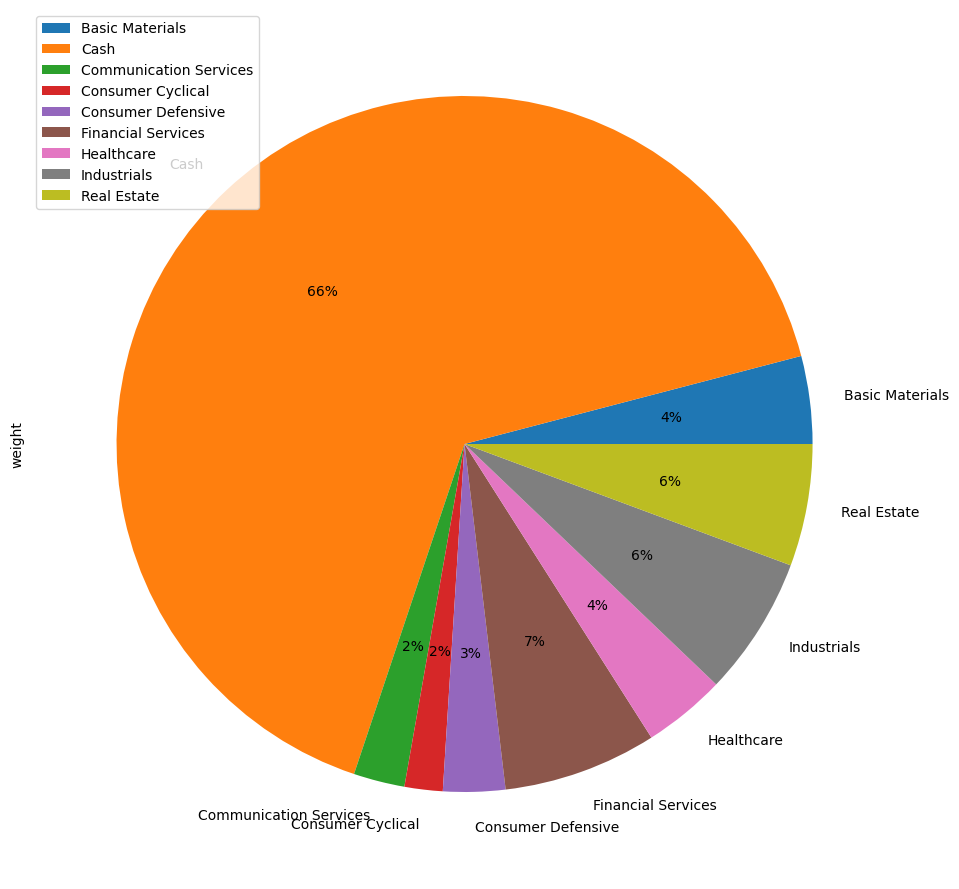

In [ ]:
new_dataset.groupby(['Sector']).sum().plot(kind='pie', y='weight', autopct='%1.0f%%')

plt.tight_layout()

# We save the graph in jpg format
plt.savefig("my_graph.jpg")
plt.show()

In [ ]:

dataset = new_dataset
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(dataset).mark_bar().encode(
  x='sum(weight)',
  y='Sector',
  color='Sector'
)

alt.Chart(...)

In [ ]:
RankingTable08092023 = pd.read_csv("/content/ranking_table130923.csv")
RankingTable08092023

,symbol,name,ticker,momentum_score,rank,date,close,20d_vol,close_90_roc,weight,units,ZAR,100d_sma,index,index_sma,trend,index_trend
0,TRU.XJSE,TRUWORTHS INT LTD,TRU,3.684237,1.0,2023-09-13,7400.0,0.014953,43.410853,0.017039,36.049304,2667.648472,5971.70,3679.0,3808.027947,True,False
1,SDO.XJSE,STADIO HOLDINGS LIMITED,SDO,1.449046,2.0,2023-09-13,507.0,0.023255,12.666667,0.010957,338.335805,1715.362532,469.69,3679.0,3808.027947,True,False
2,ADH.XJSE,ADVTECH LTD,ADH,1.393662,3.0,2023-09-13,2080.0,0.014759,13.785558,0.017263,129.938155,2702.713618,1866.76,3679.0,3808.027947,True,False
3,KST.XJSE,PSG KONSULT LIMITED,KST,1.367644,4.0,2023-09-13,1335.0,0.013880,2.692308,0.018357,215.277002,2873.947982,NaN,3679.0,3808.027947,False,False
4,ABG.XJSE,ABSA GROUP LIMITED,ABG,1.278030,5.0,2023-09-13,17308.0,0.015736,3.951952,0.016191,14.645904,2534.913120,17188.86,3679.0,3808.027947,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,BAW.XJSE,BARLOWORLD LTD,BAW,0.074311,66.0,2023-09-13,8287.0,0.015535,-6.000454,0.016401,30.985297,2567.751556,8562.07,3679.0,3808.027947,False,False
66,SSK.XJSE,STEFANUTI STCK HLDGS LTD,SSK,0.066721,67.0,2023-09-13,127.0,0.036244,-2.307692,0.007030,866.633481,1100.624520,130.88,3679.0,3808.027947,False,False
67,IPF.XJSE,INVESTEC PROPERTY FUND LTD,IPF,0.064285,68.0,2023-09-13,745.0,0.009154,-13.972286,0.027836,584.958286,4357.939233,779.61,3679.0,3808.027947,False,False
68,DCP.XJSE,DIS-CHEM PHARMACIES LTD,DCP,0.062948,69.0,2023-09-13,2300.0,0.020443,-9.448819,0.012464,84.840648,1951.334897,2419.17,3679.0,3808.027947,False,False


In [ ]:
Portfolio = pd.read_csv("/content/portfolio130923.csv")
Portfolio

,Unnamed: 0,name,symbol,ticker,momentum_score,rank,date,close,20d_vol,close_90_roc,weight,units,ZAR,100d_sma,index,index_sma,trend,index_trend
0,SDO.JO,STADIO HOLDINGS LIMITED,SDO.XJSE,SDO,1.449046,2.0,2023-09-13,507.0,0.023255,12.666667,0.010957,336.293753,1705.009328,469.690000,3679.0,3808.027947,True,False
1,ADH.JO,ADVTECH LTD,ADH.XJSE,ADH,1.393662,3.0,2023-09-13,2080.0,0.014759,13.785558,0.017263,129.153903,2686.401180,1866.760000,3679.0,3808.027947,True,False
2,ABG.JO,ABSA GROUP LIMITED,ABG.XJSE,ABG,1.278030,5.0,2023-09-13,17308.0,0.015736,3.951952,0.016191,14.557508,2519.613456,17188.860000,3679.0,3808.027947,True,False
3,MTM.JO,MOMENTUM MET HLDGS LTD,MTM.XJSE,MTM,1.260827,6.0,2023-09-13,1982.0,0.016835,8.424508,0.015135,118.830230,2355.215149,1849.210000,3679.0,3808.027947,True,False
4,FFB.JO,FORTRESS REIT LTD B,FFB.XJSE,FFB,1.122735,8.0,2023-09-13,583.0,0.022675,5.807623,0.011237,299.928318,1748.582096,526.460000,3679.0,3808.027947,True,False
5,MPT.JO,MPACT LIMITED,MPT.XJSE,MPT,1.108973,9.0,2023-09-13,2949.0,0.017053,9.222222,0.014941,78.842887,2325.076745,2725.210000,3679.0,3808.027947,True,False
6,SPG.JO,SUPER GROUP LTD,SPG.XJSE,SPG,1.032155,10.0,2023-09-13,3269.0,0.014804,4.977521,0.017211,81.928981,2678.258381,3256.110000,3679.0,3808.027947,True,False
7,CLI.JO,CLIENTELE LTD,CLI.XJSE,CLI,0.882501,12.0,2023-09-13,1152.0,0.015984,9.714286,0.015941,215.332326,2480.628396,1097.440000,3679.0,3808.027947,True,False
8,MRF.JO,MERAFE RESOURCES LTD,MRF.XJSE,MRF,0.817270,14.0,2023-09-13,123.0,0.029605,3.361345,0.008607,1088.871792,1339.312304,120.700000,3679.0,3808.027947,True,False
9,RDF.JO,REDEFINE PROPERTIES LTD,RDF.XJSE,RDF,0.794332,15.0,2023-09-13,352.0,0.014250,-1.123596,0.017880,790.441719,2782.354850,345.450000,3679.0,3808.027947,True,False
